## Experiment 2: Binary Classification with SVM

In this exercise, you will train a binary classifier using Support Vector Machine.

Dataset can be downloaded https://drive.google.com/drive/folders/1_50s_IxJsABTRFTWBR0XjuSOnDL4YFuQ

The steps are:
1.   Load and explore dataset
2.   Data preparation
3.   Split data
4.   Scale data
5.   Assess baseline model
6.   Train SVC with default Hyperparameter
7.   Reduce SVC Overfitting with class weights
8.   Reduce SVC Overfitting with C Hyperparameter
9.   Reduce SVC Overfitting with C Hyperparameter
10.  Reduce SVC Overfitting with C Hyperparameter
11.  Assess model on Testing Set

## 1. Load and Explore Dataset

**[1.1]** Import the pandas and numpy packages

In [ ]:
import pandas as pd
import numpy as np

**[1.2]** Mounting the drive

In this notebook, I'm mounting the Google drive to read a csv file that is stored on my drive. You must allow access to your drive by signing in to your Google account.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Download the repurchase_training.csv from here: https://drive.google.com/drive/folders/1_50s_IxJsABTRFTWBR0XjuSOnDL4YFuQ

Then, copy it to your Google drive folder which contains the notebook

In [ ]:
# After executing the cell above, Drive files will be present in "/content/drive/My Drive". The below command lists the contents in the drive:
!ls "/content/drive/My Drive"

 AT2_default_template.gdoc
 atlassian_reviews.csv
 CNN_Articles_2021-2023.csv
 CNN_Articles_2021-2023.gsheet
'Colab Notebooks'
'Copy of Data meaning https:  tinyurl.com DSI-Dmean-c (1).gsheet'
'Copy of Data meaning https:  tinyurl.com DSI-Dmean-c (2).gsheet'
'Copy of Data meaning https:  tinyurl.com DSI-Dmean-c (3).gsheet'
'Copy of Data meaning https:  tinyurl.com DSI-Dmean-c.gsheet'
'Copy of MLAA - Lecture 1.gslides'
'Copy of MLAA - Lecture 2.gslides'
'Copy of MLAA - Lecture 5.gslides'
 data
'DSP_AT3 _REPORT.gdoc'
'DSP - Lab 4 - Exercise 1 - Solutions.gdoc'
 DVN_data
'Experiment reports'
'Experiment reports 2'
 glassdoor_data
 Lambda_Project_Report_Draft.gdoc
 NLP_data
'ODI Data Ethics Canvas.gdoc'
'Reddit_Data (1).csv'
 Untitled
'Untitled document (1).gdoc'
'Untitled document.gdoc'


**[1.3]** Create a variable called file_url containing the link to the CSV file and load the dataset into dataframe called df

In [ ]:
file_url = '/content/drive/My Drive/data/repurchase_training_cleaned.csv'
df = pd.read_csv(file_url)

In [ ]:
# Unit Tests
assert isinstance(df, pd.DataFrame)

**[1.4]** Display the first 5 rows of df

In [ ]:
df.head()

,Unnamed: 0,Target,car_model,car_segment,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,mth_since_last_serv,annualised_mileage,num_dealers_visited,num_serv_dealer_purchased,gender_0,gender_Female,gender_Male
0,0,0,0.0,1.0,9,2,10,3,7,5,6,9,8,10,4,0,0,1
1,1,0,1.0,0.0,6,10,3,10,4,9,10,6,10,7,10,1,0,0
2,2,0,2.0,2.0,9,10,9,10,9,10,10,7,10,6,10,0,0,1
3,3,0,2.0,2.0,5,8,5,8,4,5,6,4,10,9,7,1,0,0
4,4,0,1.0,0.0,8,9,4,10,7,9,8,5,4,4,9,0,1,0


**[1.5]** Display the dimensions (shape) of df

In [ ]:
df.shape

(131279, 18)

**[1.6]** Display the summary (info) of df

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131279 entries, 0 to 131278
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Unnamed: 0                 131279 non-null  int64  
 1   Target                     131279 non-null  int64  
 2   car_model                  131279 non-null  float64
 3   car_segment                131279 non-null  float64
 4   age_of_vehicle_years       131279 non-null  int64  
 5   sched_serv_warr            131279 non-null  int64  
 6   non_sched_serv_warr        131279 non-null  int64  
 7   sched_serv_paid            131279 non-null  int64  
 8   non_sched_serv_paid        131279 non-null  int64  
 9   total_paid_services        131279 non-null  int64  
 10  total_services             131279 non-null  int64  
 11  mth_since_last_serv        131279 non-null  int64  
 12  annualised_mileage         131279 non-null  int64  
 13  num_dealers_visited        13

**[1.7]** Display the descriptive statictics of df


In [ ]:
df.describe()

,Unnamed: 0,Target,car_model,car_segment,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,mth_since_last_serv,annualised_mileage,num_dealers_visited,num_serv_dealer_purchased,gender_0,gender_Female,gender_Male
count,131279.000000,131279.000000,131279.000000,131279.000000,131279.000000,131279.000000,131279.000000,131279.000000,131279.000000,131279.000000,131279.000000,131279.000000,131279.000000,131279.000000,131279.000000,131279.000000,131279.000000,131279.000000
mean,65670.174407,0.026813,2.980340,0.981467,5.494108,5.454071,5.473891,5.453843,5.498336,5.483360,5.456676,5.471355,5.504475,5.486978,5.482286,0.527876,0.197511,0.274614
std,37913.357177,0.161538,2.581776,0.901238,2.842468,2.883944,2.870335,2.886114,2.878435,2.879763,2.875332,2.859098,2.854379,2.876378,2.867210,0.499224,0.398122,0.446321
min,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,32837.500000,0.000000,1.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,0.000000,0.000000,0.000000
50%,65672.000000,0.000000,2.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000,0.000000,0.000000
75%,98499.500000,0.000000,4.000000,2.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,1.000000,0.000000,1.000000
max,131336.000000,1.000000,17.000000,2.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,1.000000,1.000000


**[1.8]** Create a for loop that will iterate through each columns and print their list of unique values

In [ ]:
for col in df.columns:
  print(col)
  print(df[col].unique())

Unnamed: 0
[     0      1      2 ... 131334 131335 131336]
Target
[0 1]
car_model
[ 0.  1.  2.  4.  5.  3.  6.  7.  8.  9. 10. 12. 11. 13. 14. 15. 16. 17.]
car_segment
[1. 0. 2.]
age_of_vehicle_years
[ 9  6  5  8  7  1  3  4 10  2]
sched_serv_warr
[ 2 10  8  9  4  1  3  7  5  6]
non_sched_serv_warr
[10  3  9  5  4  8  1  6  2  7]
sched_serv_paid
[ 3 10  8  5  2  6  1  4  9  7]
non_sched_serv_paid
[ 7  4  9  3  1  2  6  5 10  8]
total_paid_services
[ 5  9 10  6  8  1  2  7  3  4]
total_services
[ 6 10  8  4  2  1  3  5  9  7]
mth_since_last_serv
[ 9  6  7  4  5  8  1  3 10  2]
annualised_mileage
[ 8 10  4  5  6  1  7  3  9  2]
num_dealers_visited
[10  7  6  9  4  5  2  1  3  8]
num_serv_dealer_purchased
[ 4 10  7  9  8  3  1  6  2  5]
gender_0
[0 1]
gender_Female
[0 1]
gender_Male
[1 0]


## 2. Data Preparation

**[2.1]** Create a copy of df and save it into a variable called df_cleaned

In [ ]:
df_cleaned = df.copy()

In [ ]:
# Unit Tests
assert isinstance(df_cleaned, pd.DataFrame)
assert df_cleaned.shape == df.shape

**[2.2]** Dropping "Unnamed: 0" column

In [ ]:
df_cleaned = df_cleaned.drop('Unnamed: 0', axis='columns')

**[2.3]** Display the head of the dataframe

In [ ]:
df_cleaned.head()

,Target,car_model,car_segment,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,mth_since_last_serv,annualised_mileage,num_dealers_visited,num_serv_dealer_purchased,gender_0,gender_Female,gender_Male
0,0,0.0,1.0,9,2,10,3,7,5,6,9,8,10,4,0,0,1
1,0,1.0,0.0,6,10,3,10,4,9,10,6,10,7,10,1,0,0
2,0,2.0,2.0,9,10,9,10,9,10,10,7,10,6,10,0,0,1
3,0,2.0,2.0,5,8,5,8,4,5,6,4,10,9,7,1,0,0
4,0,1.0,0.0,8,9,4,10,7,9,8,5,4,4,9,0,1,0


## 3. Split data

**[3.1]** Extract the target variable into a variable called y

In [ ]:
y = df_cleaned.pop('Target')

**[3.2]** Create a variable called X that contains all the variables

In [ ]:
X = df_cleaned

**[3.3]** Import train_test_split from sklearn.model_selection

In [ ]:
from sklearn.model_selection import train_test_split

**[3.4]** Split the dataset into 2 different sets: data (90%) and test (10%)

In [ ]:
X_data, X_test, y_data, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

**[3.6]** Split the data randomly into 2 different sets: training (90%) and validation (10%)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, test_size=0.1, random_state=42)

**[3.7]** Export cleaned X_train, X_val, X_test, y_train, y_val, y_test to csv files stored in drive

In [ ]:
X_train.to_csv('/content/drive/My Drive/data/X_train.csv')
X_val.to_csv('/content/drive/My Drive/data/X_val.csv')
X_test.to_csv('/content/drive/My Drive/data/X_test.csv')
y_train.to_csv('/content/drive/My Drive/data/y_train.csv')
y_val.to_csv('/content/drive/My Drive/data/y_val.csv')
y_test.to_csv('/content/drive/My Drive/data/y_test.csv')

## 5. Assess Baseline Model

**[5.1]** Find the mode of the target variable from the training set and print its value

In [ ]:
y_mode = y_train.mode()
y_mode

0    0
Name: Target, dtype: int64

**[5.2]** Create a numpy array with the same dimensions as for the training set called y_base filled with this value



In [ ]:
y_base = np.full(y_train.shape, y_mode)

**[5.3]** Import the accuracy and f1 scores from sklearn

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

**[5.4]** Display the accuracy and f1 scores of this baseline model on the training set

In [ ]:
print(accuracy_score(y_train, y_base))
print(f1_score(y_train, y_base, average='weighted'))

0.9730474443974232
0.9597552575199423


### 6. Train SVC with default Hyperparameter

**[6.1]** Import SVC from sklearn.svm

In [ ]:
from sklearn.svm import SVC

**[6.2]** Instantiate a SVC() model with default hyperparameters

In [ ]:
svc_1 = SVC()

**[6.3]** Train the model on the training set

In [ ]:
svc_1.fit(X_train, y_train)

SVC()

**[6.4]** Print the accuracy and f1 scores of the training set

In [ ]:
y_train_preds = svc_1.predict(X_train)
print(accuracy_score(y_train, y_train_preds))
print(f1_score(y_train, y_train_preds, average='weighted'))

0.9885362298396577
0.9874531811271061


**[6.5]** Import confusion_matrix, ConfusionMatrixDisplay from sklearn.metrics and matplotlib

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

**[6.6]** Create a confusion matrix on the training set

In [ ]:
confusion_matrix(y_train, y_train_preds, labels=svc_1.classes_)

array([[103324,    145],
       [  1074,   1792]])

**[6.7]** Create a frequency confusion matrix on the training set

In [ ]:
confusion_matrix(y_train, y_train_preds, labels=svc_1.classes_, normalize='true')

array([[0.99859861, 0.00140139],
       [0.37473831, 0.62526169]])

**[6.8]** Display the confusion matrix as a chart

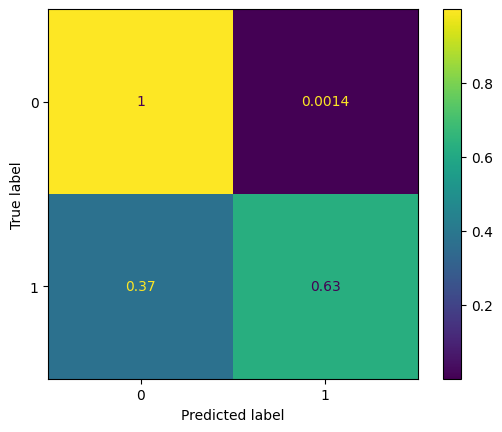

In [ ]:
ConfusionMatrixDisplay.from_estimator(svc_1, X_train, y_train, normalize='true')

**[6.9]** Print the accuracy and f1 scores of the validation set

In [ ]:
y_val_preds = svc_1.predict(X_val)
print(accuracy_score(y_val, y_val_preds))
print(f1_score(y_val, y_val_preds, average='weighted'))

0.987813134732566
0.9863871647066993


**[6.10]** Print the confusion matrix on the validation set

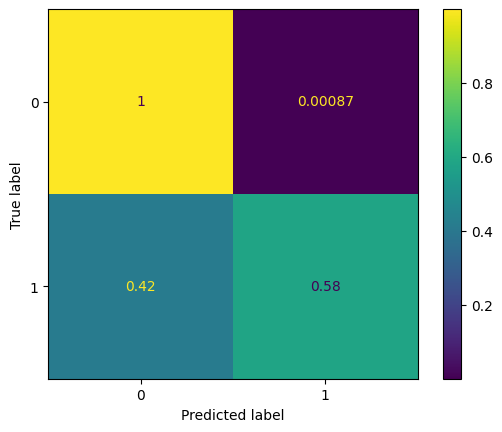

In [ ]:
ConfusionMatrixDisplay.from_estimator(svc_1, X_val, y_val, normalize='true')

## 7. Reduce SVC Overfitting with class weights

**[7.1]** Instantiate another SVC model by adding a weighting hyperparameter in order to balance each class 

In [ ]:
svc_2 = SVC(class_weight='balanced')

**[7.2]** Train this model on the training set

In [ ]:
svc_2.fit(X_train, y_train)

SVC(class_weight='balanced')

**[7.3]** Save its predictions from the training and validation sets on 2 different variables

In [ ]:
y_train_preds = svc_2.predict(X_train)
y_val_preds = svc_2.predict(X_val)

**[7.4]** Display the accuracy score on the training and validation sets

In [ ]:
print(accuracy_score(y_train, y_train_preds))
print(accuracy_score(y_val, y_val_preds))

0.9503362016269338
0.9525220040622884


**[7.5]** Display the f1 score on the training and validation sets

In [ ]:
print(f1_score(y_train, y_train_preds, average='weighted'))
print(f1_score(y_val, y_val_preds, average='weighted'))

0.9614317151046496
0.9627863918406394


**[7.6]** Display the confusion matrices for this model on the training set

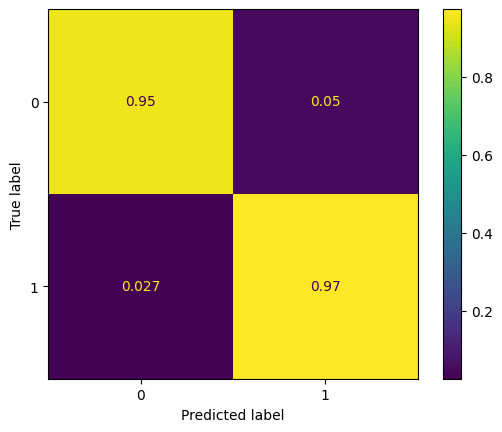

In [ ]:
ConfusionMatrixDisplay.from_estimator(svc_2, X_train, y_train, normalize='true')

**[7.7]** Display the confusion matrices for this model on the validation set

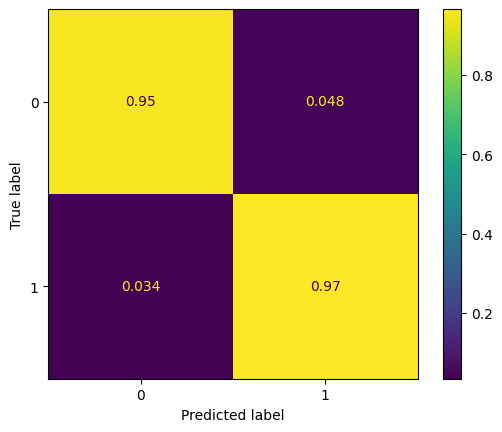

In [ ]:
ConfusionMatrixDisplay.from_estimator(svc_2, X_val, y_val, normalize='true')

## 8. Reduce SVC Overfitting with C Hyperparameter

**[8.1]** Train a SVC model with C=0.5

In [ ]:
svc_c_1 = SVC(class_weight='balanced', C=0.5).fit(X_train, y_train)

**[8.2]** Save its predictions from the training and validation sets on 2 different variables

In [ ]:
y_train_preds = svc_c_1.predict(X_train)
y_val_preds = svc_c_1.predict(X_val)

**[8.3]** Display the accuracy score on the training and validation sets

In [ ]:
print(accuracy_score(y_train, y_train_preds))
print(accuracy_score(y_val, y_val_preds))

0.9450322095264965
0.9478672985781991


**[8.4]** Display the f1 score on the training and validation sets

In [ ]:
print(f1_score(y_train, y_train_preds, average='weighted'))
print(f1_score(y_val, y_val_preds, average='weighted'))

0.9579369459211049
0.9597612208743009


**[8.5]** Plot the confusion matrics for the training set

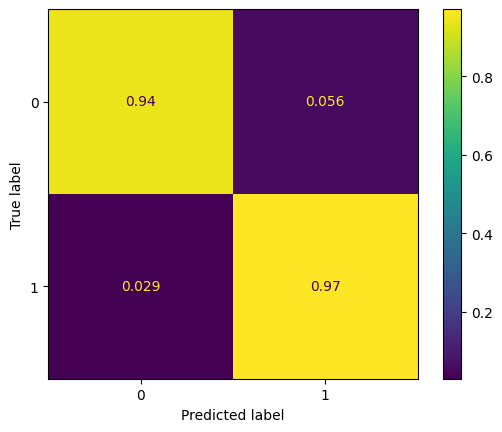

In [ ]:
ConfusionMatrixDisplay.from_estimator(svc_c_1, X_train, y_train, normalize='true')

**[8.6]** Plot the confusion matrics for the validation set

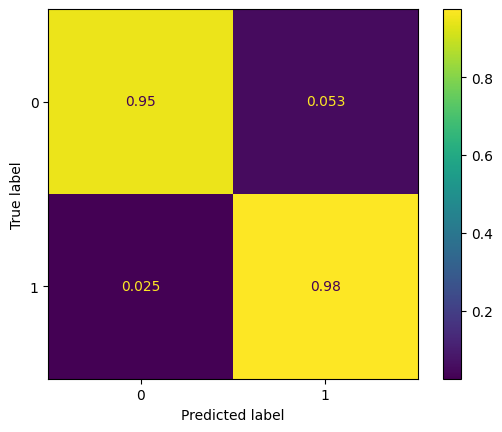

In [ ]:
ConfusionMatrixDisplay.from_estimator(svc_c_1, X_val, y_val, normalize='true')

## 9. Reduce SVC Overfitting with C Hyperparameter

**[9.1]** Train a SVC model with a different value for C

In [ ]:
svc_c_2 = SVC(class_weight='balanced', C=1).fit(X_train, y_train)

**[9.2]** Save its predictions from the training and validation sets on 2 different variables

In [ ]:
y_train_preds = svc_c_2.predict(X_train)
y_val_preds = svc_c_2.predict(X_val)

**[9.3]** Display the accuracy score on the training and validation sets

In [ ]:
print(accuracy_score(y_train, y_train_preds))
print(accuracy_score(y_val, y_val_preds))

0.9503362016269338
0.9525220040622884


**[9.4]** Display the f1 score on the training and validation sets

In [ ]:
print(f1_score(y_train, y_train_preds, average='weighted'))
print(f1_score(y_val, y_val_preds, average='weighted'))

0.9614317151046496
0.9627863918406394


**[9.5]** Plot the confusion matrics for the training set

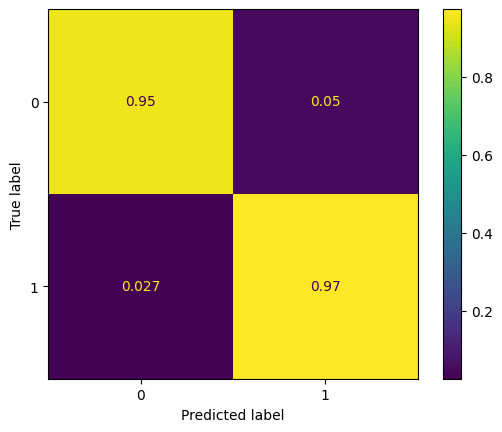

In [ ]:
ConfusionMatrixDisplay.from_estimator(svc_c_2, X_train, y_train, normalize='true')

**[9.6]** Plot the confusion matrics for the validation set

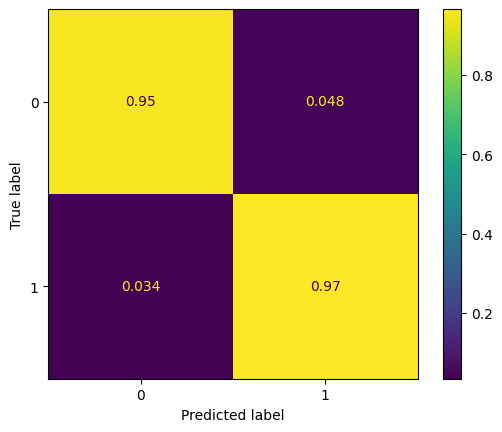

In [ ]:
ConfusionMatrixDisplay.from_estimator(svc_c_2, X_val, y_val, normalize='true')

## 10. Reduce SVC Overfitting with C Hyperparameter

**[10.1]** Train a SVC model with a different value for C

In [ ]:
svc_c_3 = SVC(class_weight='balanced', C=1.5).fit(X_train, y_train)

**[10.2]** Save its predictions from the training and validation sets on 2 different variables

In [ ]:
y_train_preds = svc_c_3.predict(X_train)
y_val_preds = svc_c_3.predict(X_val)

**[10.3]** Display the accuracy score on the training and validation sets

In [ ]:
print(accuracy_score(y_train, y_train_preds))
print(accuracy_score(y_val, y_val_preds))

0.9525932195420135
0.9551455653351388


**[10.4]** Display the f1 score on the training and validation sets

In [ ]:
print(f1_score(y_train, y_train_preds, average='weighted'))
print(f1_score(y_val, y_val_preds, average='weighted'))

0.9629436748236039
0.9645457826788219


**[10.5]** Plot the confusion matrics for the training set

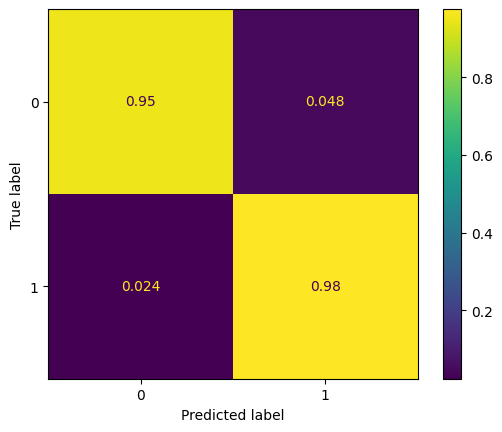

In [ ]:
ConfusionMatrixDisplay.from_estimator(svc_c_3, X_train, y_train, normalize='true')

**[10.6]** Plot the confusion matrics for the validation set

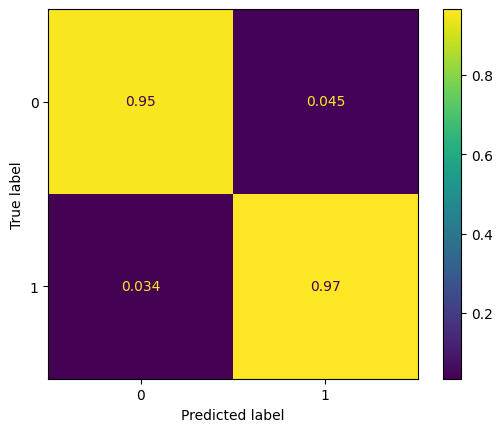

In [ ]:
ConfusionMatrixDisplay.from_estimator(svc_c_3, X_val, y_val, normalize='true')

## 11. Reduce SVC Overfitting with C Hyperparameter

**[11.1]** Train a SVC model with a different value for C

In [ ]:
svc_c_4 = SVC(class_weight='balanced', C=0.45).fit(X_train, y_train)

**[11.2]** Save its predictions from the training and validation sets on 2 different variables

In [ ]:
y_train_preds = svc_c_4.predict(X_train)
y_val_preds = svc_c_4.predict(X_val)

**[11.3]** Display the accuracy score on the training and validation sets

In [ ]:
print(accuracy_score(y_train, y_train_preds))
print(accuracy_score(y_val, y_val_preds))

0.9441858278083416
0.9466824644549763


**[11.4]** Display the f1 score on the training and validation sets

In [ ]:
print(f1_score(y_train, y_train_preds, average='weighted'))
print(f1_score(y_val, y_val_preds, average='weighted'))

0.9573839588283661
0.9589831768334944


**[11.5]** Plot the confusion matrics for the training set

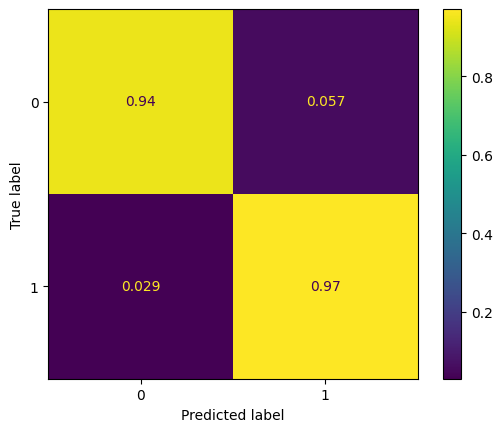

In [ ]:
ConfusionMatrixDisplay.from_estimator(svc_c_4, X_train, y_train, normalize='true')

**[11.6]** Plot the confusion matrics for the validation set

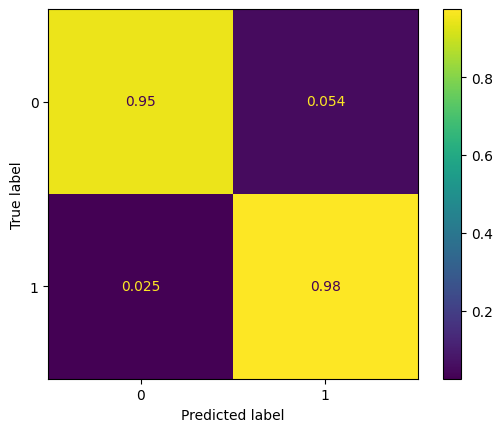

In [ ]:
ConfusionMatrixDisplay.from_estimator(svc_c_4, X_val, y_val, normalize='true')

## 11.  Assess model on Testing Set

**[11.1]** Print the accuracy and f1 scores on the testing set

In [ ]:
y_test_preds = svc_c_3.predict(X_test)
print(accuracy_score(y_test, y_test_preds))
print(f1_score(y_test, y_test_preds, average='weighted'))

0.9505636806825106
0.9618936808779911


**[11.2]** Plot the confusion matrics for the training and validation sets

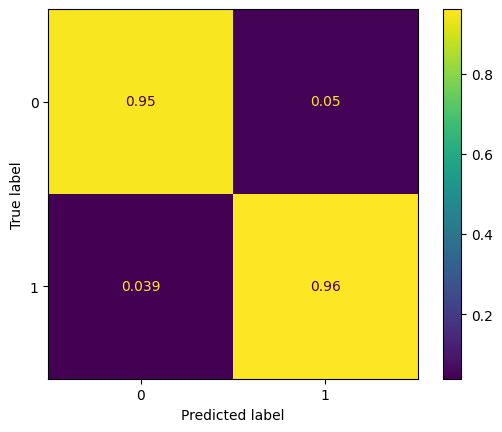

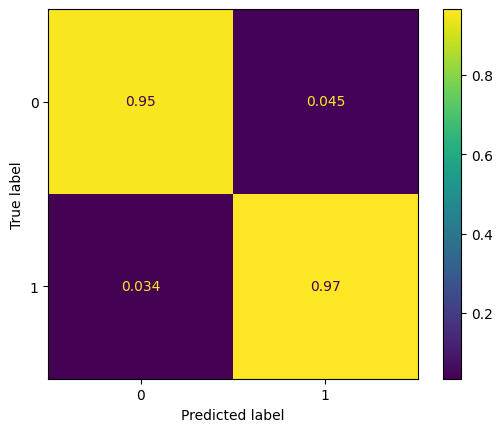

In [ ]:
ConfusionMatrixDisplay.from_estimator(svc_c_3, X_test, y_test, normalize='true')
ConfusionMatrixDisplay.from_estimator(svc_c_3, X_val, y_val, normalize='true')